# Data Exploration

Importing helper functions for visualization and data loading:

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

from visualization import *
from data_loading import *

## Loading Data

In [2]:
df = load_dataframe('../data/2017.json')
df.head()

,Grade,UserRating,Moves
0,6A+,1,"[H5, E7, F8, D10, E13, C14, C16, B18, E18, F9,..."
1,6A+,2,"[H5, E7, D8, D10, E13, C14, C16, B18, E18]"
2,6B+,2,"[A4, B4, C7, D9, F12, D15, F18]"
3,6A+,2,"[K4, J4, I7, H9, I10, F12, F13, E6, B14, C16, ..."
4,6B+,2,"[G8, D9, F12, C13, F15, D17, F18, E6, G4, F4]"


Adding Font Scale and V-Grades. These are different climbing grades describing the difficulty of a climb.

In [3]:
df = add_font_scale_column(df)
df = add_v_grade(df)
df.head()

,Grade,UserRating,Moves,font_scale,v_grade_str,v_grade
0,6A+,1,"[H5, E7, F8, D10, E13, C14, C16, B18, E18, F9,...",0,V3,0
1,6A+,2,"[H5, E7, D8, D10, E13, C14, C16, B18, E18]",0,V3,0
2,6B+,2,"[A4, B4, C7, D9, F12, D15, F18]",2,V4,1
3,6A+,2,"[K4, J4, I7, H9, I10, F12, F13, E6, B14, C16, ...",0,V3,0
4,6B+,2,"[G8, D9, F12, C13, F15, D17, F18, E6, G4, F4]",2,V4,1


## Visualizing Grades Distribution

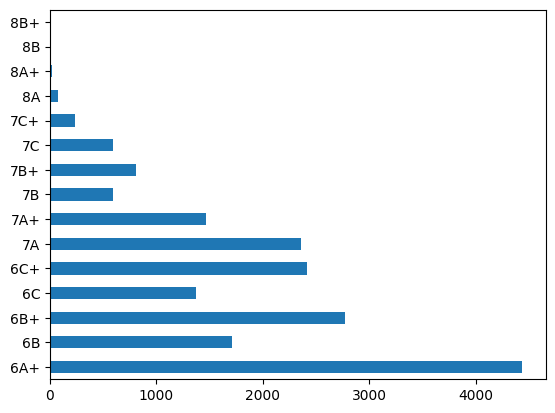

In [5]:
bar_plot(df)

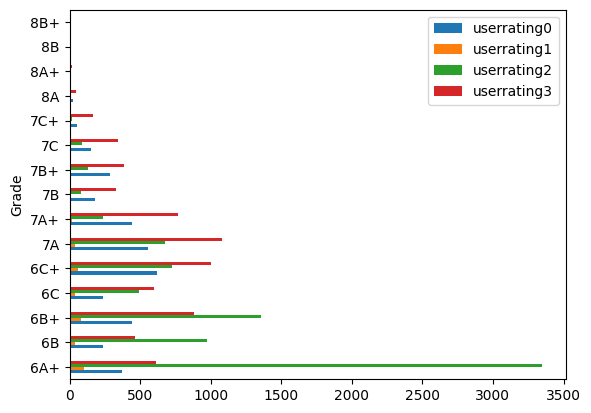

In [6]:
plot_user_rating_per_grade(df)

## Visualizing Routes and Heatmaps per Grade

Choose a route by setting route_i to a number between 0 and 18865


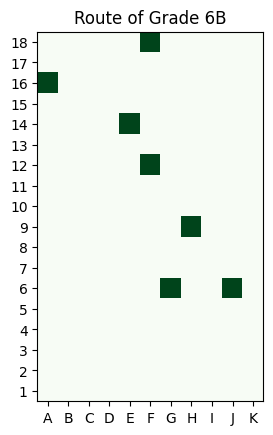

In [17]:
print(f'Choose a route by setting route_i to a number between 0 and {df.shape[0]}')
route_i = 123

plot_route(df, route_i)

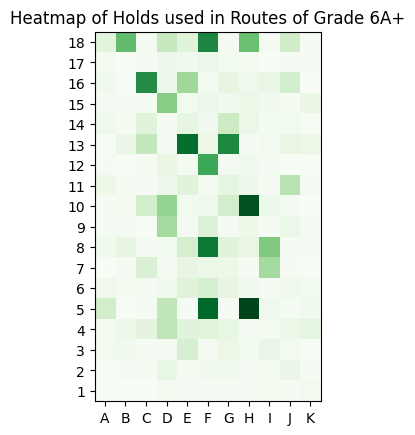

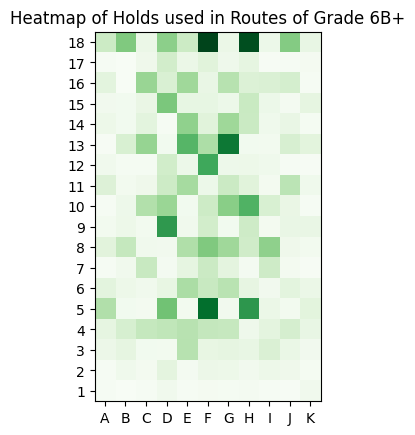

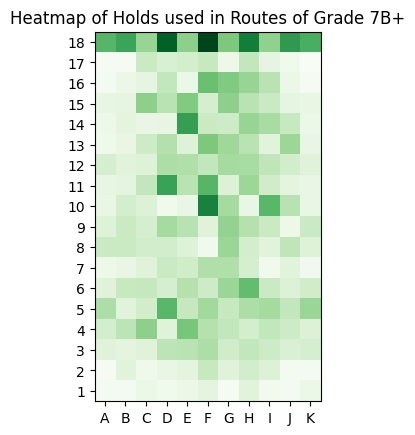

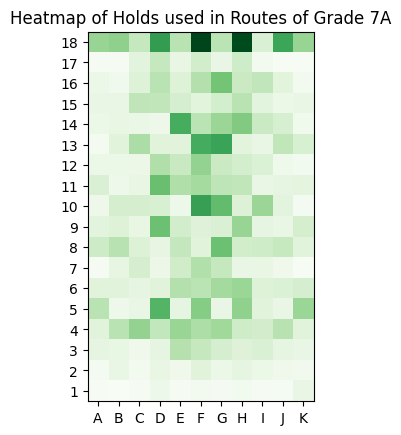

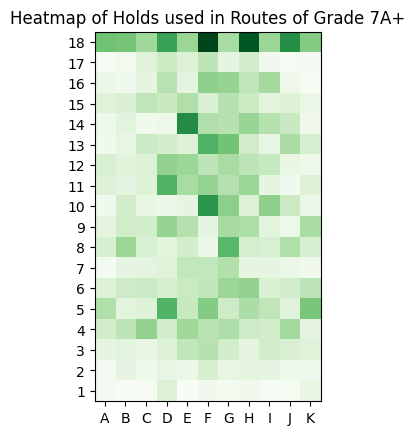

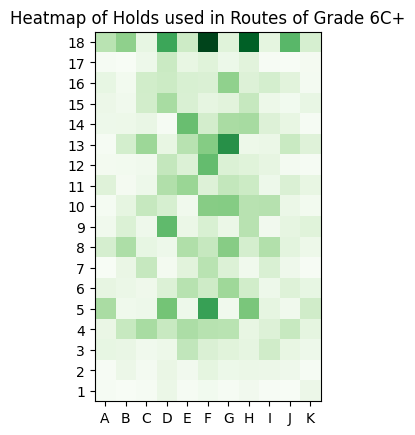

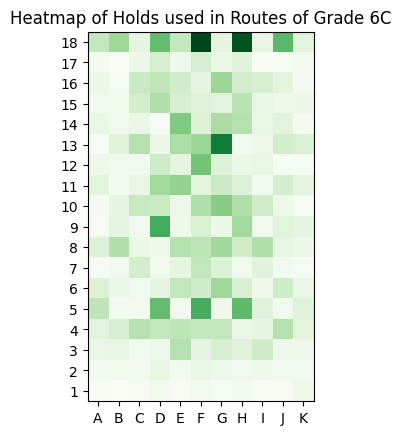

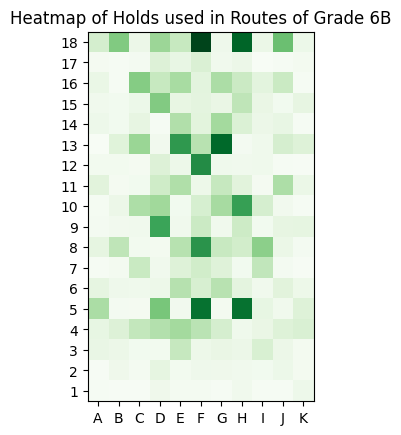

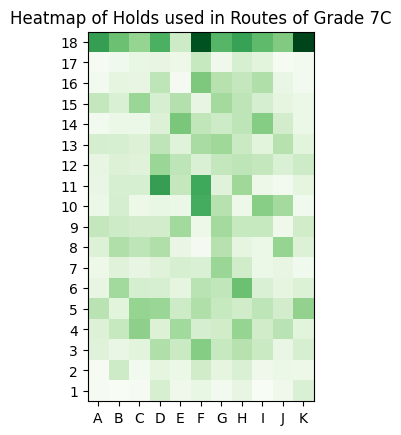

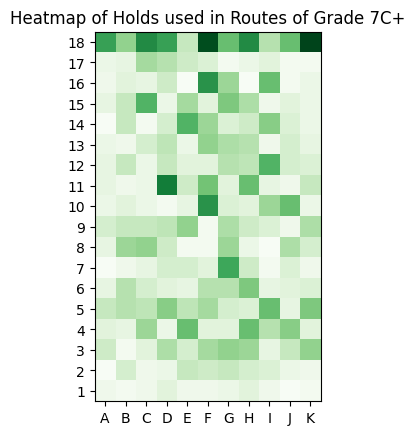

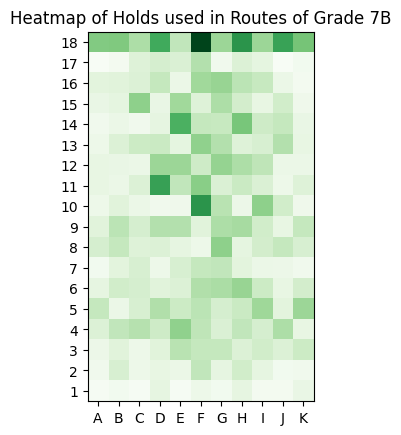

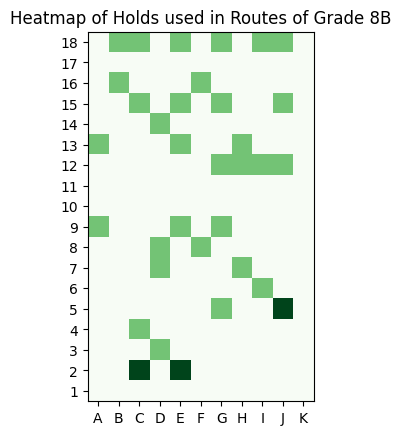

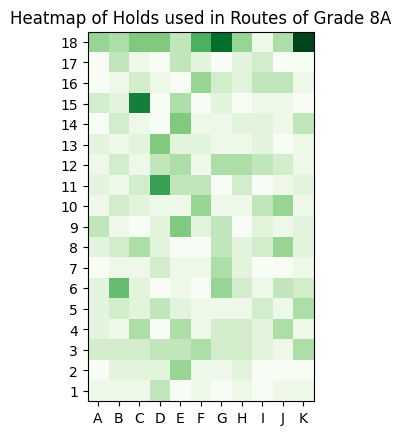

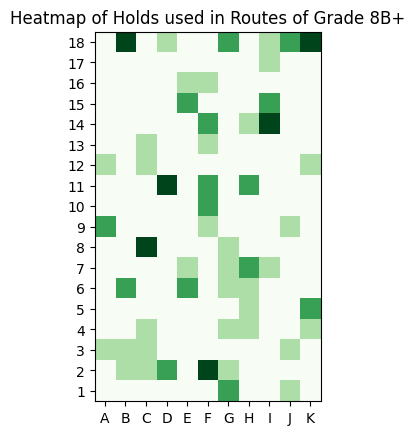

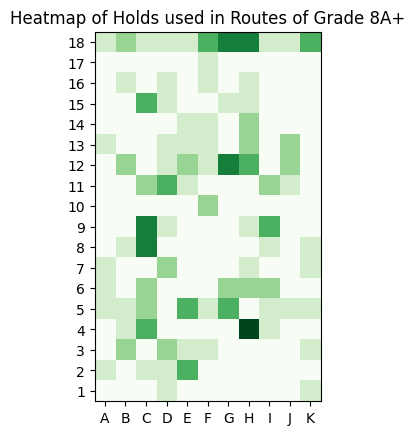

In [19]:
for grade in df.Grade.unique():
    plot_grade_heatmap(df, grade)

## Average Route Rating per Grade

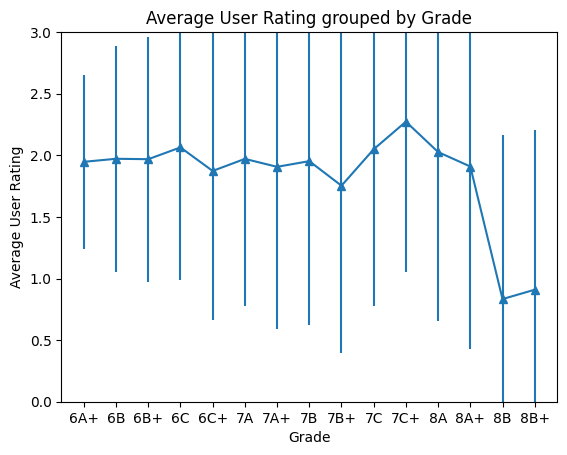

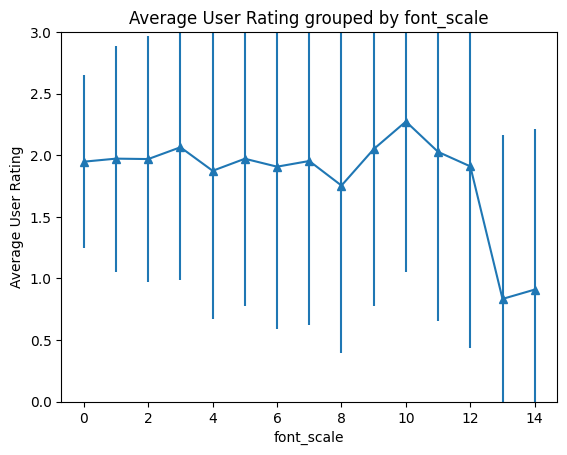

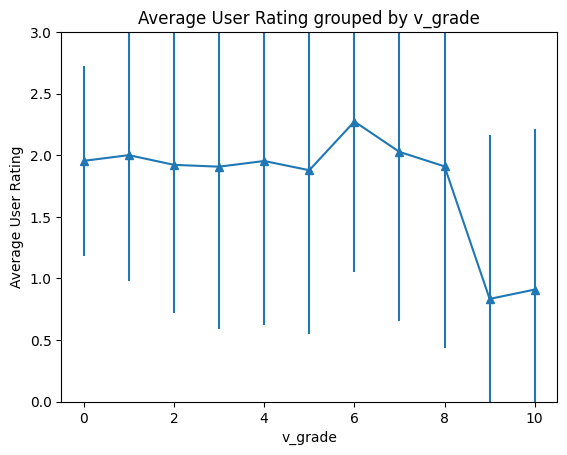

In [97]:
for groupby_index in ["Grade", "font_scale", "v_grade"]:
    user_rating_per_grade = df.groupby([groupby_index]).agg({'UserRating': [np.mean, np.std]})['UserRating']

    x = user_rating_per_grade.index
    y = user_rating_per_grade['mean']
    err = user_rating_per_grade['std']

    plt.errorbar(x, y, err, linestyle=None, marker='^')
    plt.xlabel(f'{groupby_index}')
    plt.ylim(0, 3)
    plt.ylabel('Average User Rating')
    plt.title(f'Average User Rating grouped by {groupby_index}')
    plt.show()

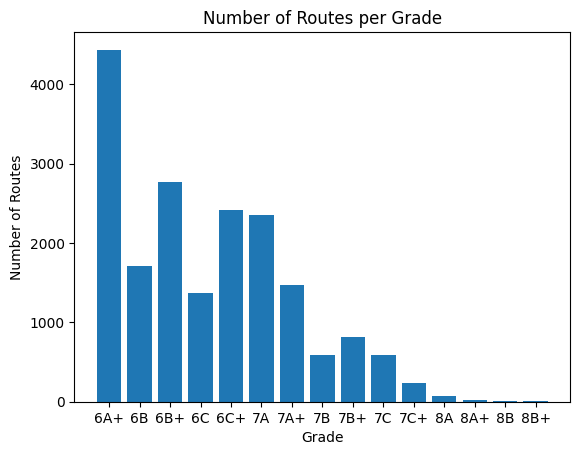

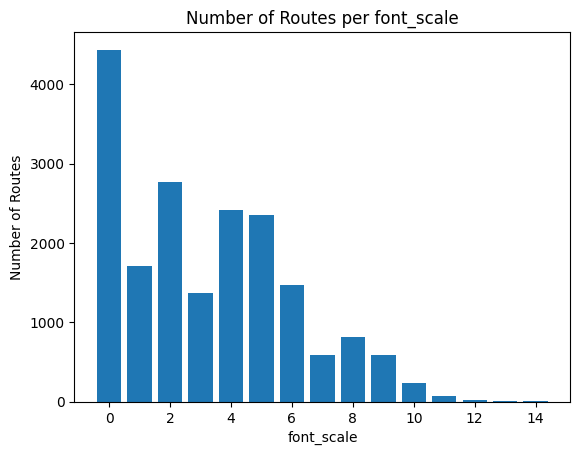

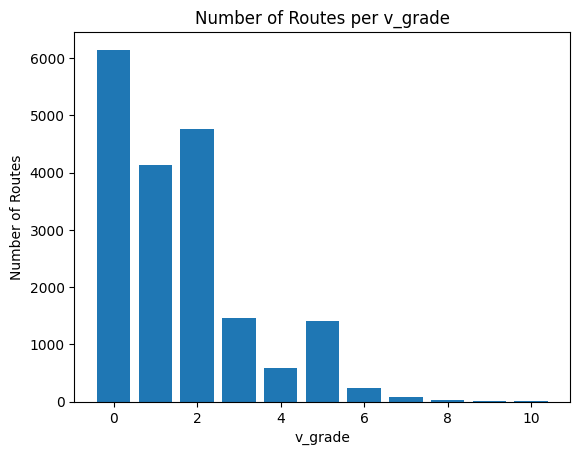

In [98]:
for groupby_index in ["Grade", "font_scale", "v_grade"]:
    user_rating_per_grade = df.groupby([groupby_index]).agg({'UserRating': [len]})['UserRating']

    x = user_rating_per_grade.index
    y = user_rating_per_grade['len']

    plt.bar(x, y)
    plt.xlabel(f'{groupby_index}')
    plt.ylabel('Number of Routes')
    plt.title(f'Number of Routes per {groupby_index}')
    plt.show()